In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load LS data

In [3]:
mooc15=pd.read_excel('../Clustering_Results/15_Dim_AR_clustering.xlsx')
mooc16=pd.read_excel('../Clustering_Results/16_Dim_AR_clustering.xlsx')

mooc15.anon_screen_name="mooc15_"+mooc15.anon_screen_name
mooc16.anon_screen_name="mooc16_"+mooc16.anon_screen_name

In [5]:
print(mooc15.shape)
print(mooc16.shape)

(32180, 21)
(20389, 21)


In [17]:
32180+20389

52569

# Concat 

In [6]:
mooc = pd.concat([mooc15,mooc16])

In [16]:
mooc.shape

(52569, 19)

In [9]:
mooc.columns

Index(['anon_screen_name', 'nbr_events_x', 'nbr_week_x', 'nbr_pause_video',
       'nbr_problem_visit', 'problem_stay_min', 'nbr_problem_submit',
       'avg_problem_submit', 'nbr_forum_post', 'nbr_sessions',
       'cluster_active', 'certs_x', 'nbr_events_y', 'nbr_week_y',
       'nbr_problem_show', 'problem_show_stay', 'avg_problem_show', 'outline',
       'view_post', 'cluster_reflective', 'certs_y'],
      dtype='object')

In [4]:
mooc=mooc15

In [5]:
mooc=mooc[['anon_screen_name', 'nbr_events_x', 'nbr_week_x', 'nbr_pause_video',
       'nbr_problem_visit', 'problem_stay_min', 'nbr_problem_submit', 'avg_problem_submit', 'nbr_forum_post', 'nbr_sessions',
       'nbr_problem_show', 'problem_show_stay', 'avg_problem_show', 'outline', 'view_post', 
       'cluster_active','cluster_reflective', 'certs_y']]

In [6]:
mooc.cluster_active.unique()

array(['Very Weak', 'Moderate', 'Strong', 'Weak'], dtype=object)

# Matrix

In [7]:
mooc['LS']=None
mooc.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,anon_screen_name,nbr_events_x,nbr_week_x,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_active,cluster_reflective,certs_y,LS
0,mooc15_000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1,2,0,0.000000,0,0.000000,0,1,0,0.000000,0.000000,3,0,Very Weak,Very Weak,0,None
1,mooc15_0003ece6f51872662ee9b366cd2a72434e01a139,382,1,32,6,0.366667,0,0.000000,0,93,0,0.000000,0.000000,2,21,Very Weak,Very Weak,0,None
2,mooc15_00042c13310b03b6fc30c30c34efd2ad127517be,99,1,9,5,1.033333,5,1.000000,0,1,2,1.050000,0.400000,3,0,Moderate,Moderate,0,None
3,mooc15_00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5,309,23,8.566667,20,0.869565,0,13,20,8.216667,0.869565,12,0,Moderate,Weak,0,None
4,mooc15_0007c3a1163a8b19781443bde21b785900f56814,127,1,9,3,2.116667,3,1.000000,0,2,1,0.000000,0.333333,5,0,Moderate,Moderate,0,None


In [8]:
mask=(mooc.cluster_active=="Weak") & (mooc.cluster_reflective=="Very Weak")
mooc.ix[mask,'LS']="Moderate_active"

mask=(mooc.cluster_active=="Moderate") & (mooc.cluster_reflective=="Very Weak")
mooc.ix[mask,'LS']="Strong_active"

mask=(mooc.cluster_active=="Strong") & (mooc.cluster_reflective=="Very Weak")
mooc.ix[mask,'LS']="Strong_active"
#---------
mask=(mooc.cluster_reflective=="Weak") & (mooc.cluster_active=="Very Weak")
mooc.ix[mask,'LS']="Moderate_reflective"

mask=(mooc.cluster_reflective=="Moderate") & (mooc.cluster_active=="Very Weak")
mooc.ix[mask,'LS']="Strong_reflective"

mask=(mooc.cluster_reflective=="Strong") & (mooc.cluster_active=="Very Weak")
mooc.ix[mask,'LS']="Strong_reflective"
#---------
mask=(mooc.cluster_active=="Very Weak") & (mooc.cluster_reflective=="Very Weak")
mooc.ix[mask,'LS']="Balenced"

mask=(mooc.cluster_reflective=="Weak") & (mooc.cluster_active=="Weak")
mooc.ix[mask,'LS']="Balenced"

mask=(mooc.cluster_reflective=="Moderate") & (mooc.cluster_active=="Moderate")
mooc.ix[mask,'LS']="Balenced"

mask=(mooc.cluster_reflective=="Strong") & (mooc.cluster_active=="Strong")
mooc.ix[mask,'LS']="Balenced"
#---------
mask=(mooc.cluster_reflective=="Strong") & (mooc.cluster_active=="Weak")
mooc.ix[mask,'LS']="Strong_reflective"

mask=(mooc.cluster_reflective=="Weak") & (mooc.cluster_active=="Strong")
mooc.ix[mask,'LS']="Strong_active"
#---------
mask=(mooc.cluster_reflective=="Weak") & (mooc.cluster_active=="Moderate")
mooc.ix[mask,'LS']="Moderate_active"

mask=(mooc.cluster_reflective=="Strong") & (mooc.cluster_active=="Moderate")
mooc.ix[mask,'LS']="Moderate_reflective"

mask=(mooc.cluster_reflective=="Moderate") & (mooc.cluster_active=="Weak")
mooc.ix[mask,'LS']="Moderate_reflective"

mask=(mooc.cluster_reflective=="Moderate") & (mooc.cluster_active=="Strong")
mooc.ix[mask,'LS']="Moderate_active"

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\lenovo\Anaconda3\lib\site-p

# Statis

In [15]:
mooc.LS.value_counts()

Balenced               40128
Moderate_active         7297
Moderate_reflective     2849
Strong_active           2171
Strong_reflective        124
Name: LS, dtype: int64

In [19]:
40128+7297+2849+2171+124

52569

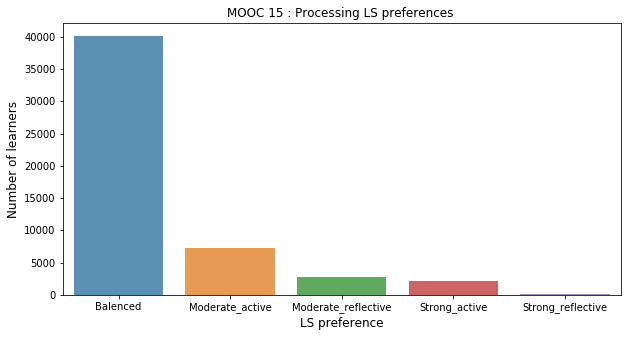

In [18]:
mooc.LS.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(mooc.LS.value_counts().index, mooc.LS.value_counts().values, alpha=0.8)
plt.title('MOOC 15 : Processing LS preferences ')
plt.ylabel('Number of learners', fontsize=12)
plt.xlabel('LS preference', fontsize=12)
plt.show()

In [20]:
# mooc[(mooc.cluster_reflective=="Very Weak")& (mooc.cluster_active=="Very Weak") & (mooc.certs_y==1)]
# mooc.reset_index(level=0, inplace=True)
mooc.groupby(['certs_y','LS','cluster_active','cluster_reflective']).agg({"anon_screen_name":"count"})

anon_screen_name
certs_y LS                  cluster_active cluster_reflective                  
0       Balenced            Moderate       Moderate                        4355
                            Strong         Strong                           595
                            Very Weak      Very Weak                      32623
                            Weak           Weak                             387
        Moderate_active     Moderate       Weak                            3796
                            Strong         Moderate                         298
                            Weak           Very Weak                       1509
        Moderate_reflective Moderate       Strong                            59
                            Very Weak      Weak                              37
                            Weak           Moderate                        2748
        Strong_active       Moderate       Very Weak                       1257
                            Strong         Very Weak                         13
                                           Weak                               2
        Strong_reflective   Very Weak      Moderate                         118
                                           Strong                             1
                            Weak           Strong                             2
1       Balenced            Moderate       Moderate                          19
                            Strong         Strong                          2145
                            Very Weak      Very Weak                          4
        Moderate_active     Moderate       Weak                               1
                            Strong         Moderate                        1690
                            Weak           Very Weak                          3
        Moderate_reflective Moderate       Strong                             2
                            Weak           Moderate                           3
        Strong_active       Moderate       Very Weak                         13
                            Strong         Very Weak                        886
        Strong_reflective   Very Weak      Moderate                           3

# Export XLS

In [24]:
mooc.set_index("anon_screen_name",inplace=True)
mooc.head()

,nbr_events_x,nbr_week_x,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_active,cluster_reflective,certs_y,LS
anon_screen_name,,,,,,,,,,,,,,,,,,
mooc15_000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1,2,0,0.000000,0,0.000000,0,1,0,0.000000,0.000000,3,0,Very Weak,Very Weak,0,Balenced
mooc15_0003ece6f51872662ee9b366cd2a72434e01a139,382,1,32,6,0.366667,0,0.000000,0,93,0,0.000000,0.000000,2,21,Very Weak,Very Weak,0,Balenced
mooc15_00042c13310b03b6fc30c30c34efd2ad127517be,99,1,9,5,1.033333,5,1.000000,0,1,2,1.050000,0.400000,3,0,Moderate,Moderate,0,Balenced
mooc15_00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5,309,23,8.566667,20,0.869565,0,13,20,8.216667,0.869565,12,0,Moderate,Weak,0,Moderate_active
mooc15_0007c3a1163a8b19781443bde21b785900f56814,127,1,9,3,2.116667,3,1.000000,0,2,1,0.000000,0.333333,5,0,Moderate,Moderate,0,Balenced


In [22]:
ex=pd.ExcelWriter('15_16_Dim_AR.xlsx')
mooc.to_excel(ex,sheet_name="Dimension_AR")
ex.save()

In [9]:
mooc.head()

,anon_screen_name,nbr_events_x,nbr_week_x,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_active,cluster_reflective,certs_y,LS
0,mooc15_000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1,2,0,0.000000,0,0.000000,0,1,0,0.000000,0.000000,3,0,Very Weak,Very Weak,0,Balenced
1,mooc15_0003ece6f51872662ee9b366cd2a72434e01a139,382,1,32,6,0.366667,0,0.000000,0,93,0,0.000000,0.000000,2,21,Very Weak,Very Weak,0,Balenced
2,mooc15_00042c13310b03b6fc30c30c34efd2ad127517be,99,1,9,5,1.033333,5,1.000000,0,1,2,1.050000,0.400000,3,0,Moderate,Moderate,0,Balenced
3,mooc15_00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5,309,23,8.566667,20,0.869565,0,13,20,8.216667,0.869565,12,0,Moderate,Weak,0,Moderate_active
4,mooc15_0007c3a1163a8b19781443bde21b785900f56814,127,1,9,3,2.116667,3,1.000000,0,2,1,0.000000,0.333333,5,0,Moderate,Moderate,0,Balenced


In [23]:
mooc[mooc.LS=='Strong_active'].describe().T

,count,mean,std,min,25%,50%,75%,max
nbr_events_x,1167.0,1002.357326,1199.463223,11.000000,177.500000,573.000000,1350.500000,12333.000000
nbr_week_x,1167.0,4.800343,3.513083,1.000000,1.000000,3.000000,9.000000,9.000000
nbr_pause_video,1167.0,71.525278,238.728574,0.000000,3.000000,14.000000,57.000000,5245.000000
nbr_problem_visit,1167.0,46.643530,44.171987,1.000000,5.000000,21.000000,103.000000,107.000000
problem_stay_min,1167.0,102.942374,179.736934,0.000000,3.541667,32.366667,114.883333,1824.683333
nbr_problem_submit,1167.0,44.608398,43.275416,1.000000,4.000000,19.000000,100.000000,103.000000
avg_problem_submit,1167.0,0.938370,0.088300,0.411765,0.875000,1.000000,1.000000,1.000000
nbr_forum_post,1167.0,0.165381,1.157821,0.000000,0.000000,0.000000,0.000000,28.000000
nbr_sessions,1167.0,19.088260,23.190129,1.000000,5.000000,11.000000,25.000000,232.000000
nbr_problem_show,1167.0,3.603256,4.586626,0.000000,0.000000,2.000000,6.000000,37.000000


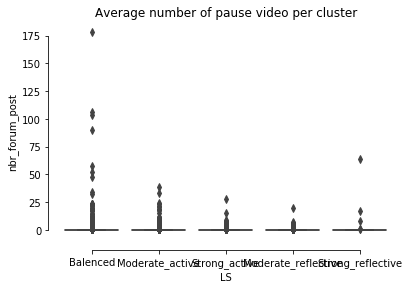

In [25]:
sns.boxplot(x="LS", y="nbr_forum_post", data=mooc, palette="PRGn").set_title("Average number of pause video per cluster")
sns.despine(offset=10, trim=True)